[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


CSV file loaded successfully.

Step 1: Add new dreams

Step 2: Performing sentiment analysis...

Step 3: Generating Word Cloud...


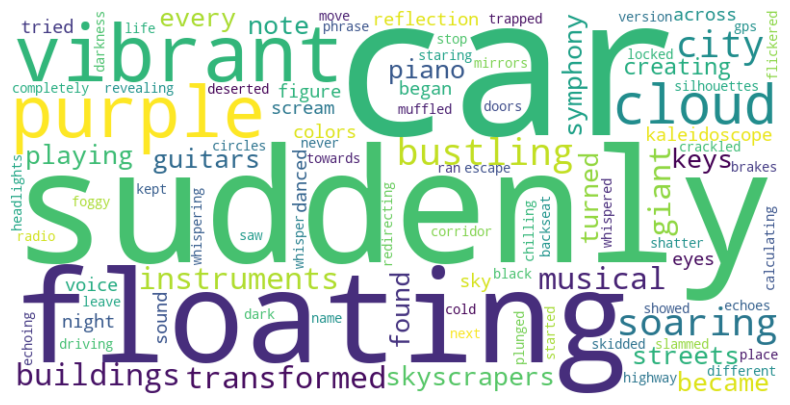


Step 4: Summary Analysis
Total Dreams Analyzed: 4
Positive Dreams: 2
Negative Dreams: 2
Neutral Dreams: 0

Polarity Distribution


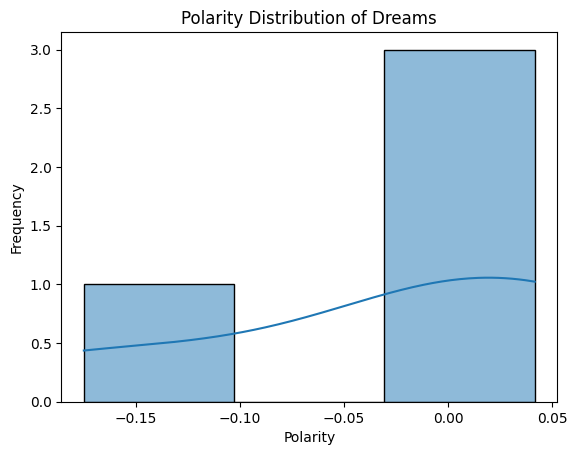


Subjectivity Distribution


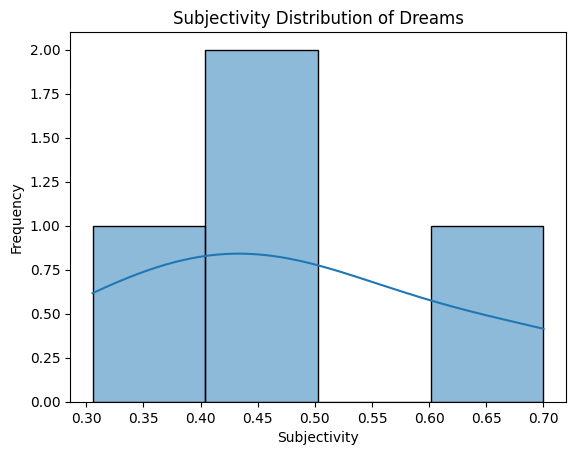


Insights from Historical Data
1. Top 5 Most Common Words in Dreams:


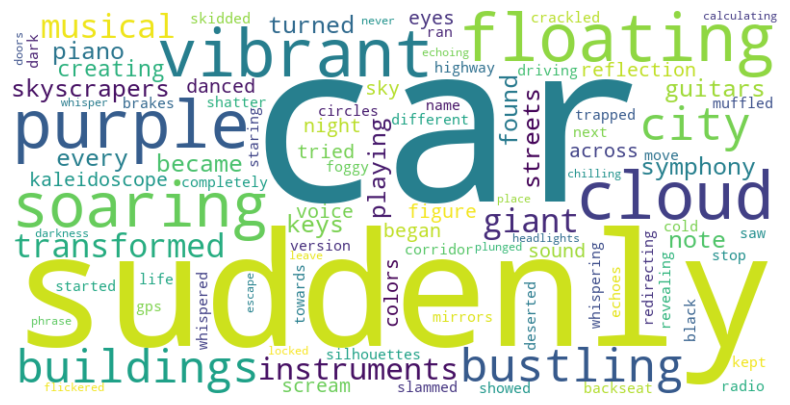

2. Average Polarity of Dreams: -0.027777777777777783
3. Average Subjectivity of Dreams: 0.4805555555555555


In [16]:
# Dream Analysis Using Pre-trained Models
# ======================================
# This notebook analyzes dreams using pre-trained sentiment models and extracts insights based on historical data.

# ================================================================
# Section 1: Import Libraries
# ================================================================
# Install required libraries
!pip install pandas nltk matplotlib seaborn textblob --quiet

# Import libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# ================================================================
# Section 2: Initialize Data Storage
# ================================================================
csv_file = "dream_records.csv"
columns = ["Dream_ID", "Description", "Sentiment", "Polarity", "Subjectivity"]

# Load or create the CSV file
try:
    dreams_df = pd.read_csv(csv_file)
    print("CSV file loaded successfully.")
except FileNotFoundError:
    print("CSV file not found. Creating a new file...")
    dreams_df = pd.DataFrame(columns=columns)
    dreams_df.to_csv(csv_file, index=False)

# ================================================================
# Section 3: Helper Functions
# ================================================================

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_tokens)

# Sentiment analysis using VADER
def analyze_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    if scores["compound"] > 0.05:
        return "Positive"
    elif scores["compound"] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Polarity and subjectivity analysis using TextBlob
def analyze_polarity_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Generate WordCloud
def generate_wordcloud(texts):
    combined_text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# ================================================================
# Section 4: Add New Dream
# ================================================================

def add_dream(description):
    global dreams_df
    preprocessed = preprocess_text(description)
    sentiment = analyze_sentiment_vader(preprocessed)
    polarity, subjectivity = analyze_polarity_subjectivity(preprocessed)
    new_entry = {
        "Dream_ID": len(dreams_df) + 1,
        "Description": description,
        "Sentiment": sentiment,
        "Polarity": polarity,
        "Subjectivity": subjectivity
    }
    dreams_df = pd.concat([dreams_df, pd.DataFrame([new_entry])], ignore_index=True)
    dreams_df.to_csv(csv_file, index=False)
    return "Dream added successfully!"

# ================================================================
# Section 5: Workflow
# ================================================================

# Step 1: Input dream descriptions
print("\nStep 1: Add new dreams")
dream_description = input("Enter your dream description: ")
add_dream(dream_description)

# Step 2: Perform sentiment analysis on all dreams
print("\nStep 2: Performing sentiment analysis...")
dreams_df["Preprocessed"] = dreams_df["Description"].apply(preprocess_text)
dreams_df["Sentiment"] = dreams_df["Preprocessed"].apply(analyze_sentiment_vader)
dreams_df["Polarity"], dreams_df["Subjectivity"] = zip(*dreams_df["Preprocessed"].apply(analyze_polarity_subjectivity))

# Step 3: Visualize WordCloud
print("\nStep 3: Generating Word Cloud...")
generate_wordcloud(dreams_df["Preprocessed"])

# Step 4: Display Summary Analysis
print("\nStep 4: Summary Analysis")
print(f"Total Dreams Analyzed: {len(dreams_df)}")
print(f"Positive Dreams: {len(dreams_df[dreams_df['Sentiment'] == 'Positive'])}")
print(f"Negative Dreams: {len(dreams_df[dreams_df['Sentiment'] == 'Negative'])}")
print(f"Neutral Dreams: {len(dreams_df[dreams_df['Sentiment'] == 'Neutral'])}")

# Polarity distribution
print("\nPolarity Distribution")
sns.histplot(dreams_df["Polarity"], kde=True)
plt.title("Polarity Distribution of Dreams")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

# Subjectivity distribution
print("\nSubjectivity Distribution")
sns.histplot(dreams_df["Subjectivity"], kde=True)
plt.title("Subjectivity Distribution of Dreams")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

# ================================================================
# Section 6: Insights from Historical Data
# ================================================================

print("\nInsights from Historical Data")
if not dreams_df.empty:
    print("1. Top 5 Most Common Words in Dreams:")
    wordcloud_text = " ".join(dreams_df["Preprocessed"])
    generate_wordcloud([wordcloud_text])

    print("2. Average Polarity of Dreams:", dreams_df["Polarity"].mean())
    print("3. Average Subjectivity of Dreams:", dreams_df["Subjectivity"].mean())
else:
    print("No historical data available.")